In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
import matplotlib.pylab as pl
from itertools import cycle
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [26]:
max_gRate = 0.083 #max growth rate of the bacteria
K = 1000 #carrying capacity for the regular simulations
big_K = 10000 #carring capacity for the big_K simulations
duration_fig4 = 100. #duration of the simulations used for the figure 4 plots

In [27]:
def readDeterministicData(filepath):
    '''
    method to read in Chris' deterministic data into pandas dataframe.
    Need to set delimiter to space, and also deal with the leading whitespace in the 1st column which produces a column of NaNs
    '''
    df = pd.read_csv(filepath, sep=" ", header=None, names=["blank", 't', 'N_edge', 'N'])
    df = df.drop(columns=['blank'])
    #truncate the data so that it's for the same duration as the stochastic ones
    return df[df['t'] < duration_fig4*max_gRate]

In [28]:

#total populations sizes over time (each dataframe contains several runs of the same parameter set)
#renamed them to reflect their immigration rate values
#list of the corresponding immigration ratios for the below dataframes
r_immig_4c = [0.51, 0.55, 0.6, 0.65, 0.7, 0.8, 0.9]

pops_4c_immig_0_51 = pd.read_csv('solo_results/ratios4cEXTRA-stochastic_pop_over_time.csv', delimiter=", ", engine='python') #was 4cEXTRA
pops_4c_immig_0_55 = pd.read_csv('solo_results/ratios4c_rImmig_0_55-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_6 = pd.read_csv('solo_results/ratios4c_rImmig_0_6-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_65 = pd.read_csv('solo_results/ratios4c_rImmig_0_65-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_7 = pd.read_csv('solo_results/ratios4c1-stochastic_pop_over_time.csv',delimiter=", ", engine='python') #was 4c1
pops_4c_immig_0_8 = pd.read_csv('solo_results/ratios4c2-stochastic_pop_over_time.csv',delimiter=", ", engine='python') #was 4c2 
pops_4c_immig_0_9 = pd.read_csv('solo_results/ratios4c3-stochastic_pop_over_time.csv',delimiter=", ", engine='python') #was 4c3

pops_4c_immig_0_51_VERYLONG = pd.read_csv('veryLongSim_results/ratios4cEXTRA-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_55_VERYLONG = pd.read_csv('veryLongSim_results/ratios4c_rImmig_0_55-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_55_bigK_VERYLONG = pd.read_csv('veryLongSim_results_bigK/ratios4c_rImmig_0_55-stochastic_pop_over_time.csv', delimiter=", ", engine='python')

pops4c = [pops_4c_immig_0_51, pops_4c_immig_0_55, pops_4c_immig_0_6, pops_4c_immig_0_65, pops_4c_immig_0_7, pops_4c_immig_0_8, pops_4c_immig_0_9] #list of all the population dataframes
#add in the time scaled by the max growth rate
# for p4c in pops4c:
#     p4c['time_g'] = p4c['t']*max_gRate




#repeated some of the fig 4c params but with K = 10,000 instead of 1,000.
r_immig_4c_bigK = [0.51, 0.55, 0.6, 0.65, 0.7, 0.8, 0.9]
pops_4c_immig_0_51_bigK = pd.read_csv('solo_results_bigK/ratios4c_rImmig_0_51-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_55_bigK = pd.read_csv('solo_results_bigK/ratios4c_rImmig_0_55-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_6_bigK = pd.read_csv('solo_results_bigK/ratios4c_rImmig_0_6-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_65_bigK = pd.read_csv('solo_results_bigK/ratios4c_rImmig_0_65-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_7_bigK = pd.read_csv('solo_results_bigK/ratios4c_rImmig_0_7-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_8_bigK = pd.read_csv('solo_results_bigK/ratios4c_rImmig_0_8-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4c_immig_0_9_bigK = pd.read_csv('solo_results_bigK/ratios4c_rImmig_0_9-stochastic_pop_over_time.csv', delimiter=", ", engine='python')

pops4c_bigK = [pops_4c_immig_0_51_bigK, pops_4c_immig_0_55_bigK, pops_4c_immig_0_6_bigK, pops_4c_immig_0_65_bigK, pops_4c_immig_0_7_bigK, pops_4c_immig_0_8_bigK, pops_4c_immig_0_9_bigK]

#the subset used for the four plots grouped together for the image of the 4 stochastic pops over time 
pops4c_bigK_subset = [pops_4c_immig_0_55_bigK, pops_4c_immig_0_6_bigK, pops_4c_immig_0_7_bigK, pops_4c_immig_0_8_bigK]
r_immig_4c_bigK_subset = [0.55, 0.6, 0.7, 0.8]

#this subset is used to compare the three plots of r_imm = 0.55. Regular, big K and big K + very long
pops4c_r_imm_0_55_K_compare = [pops_4c_immig_0_55, pops_4c_immig_0_55_bigK, pops_4c_immig_0_55_bigK_VERYLONG]


#fig 4d, deterioration regime

r_immig_4d = [0.4, 0.5]
pops_4d_rimmig_0_4 = pd.read_csv('solo_results/ratios4d1-stochastic_pop_over_time.csv',delimiter=", ", engine='python')
pops_4d_rimmig_0_5 = pd.read_csv('solo_results/ratios4d2-stochastic_pop_over_time.csv',delimiter=", ", engine='python')
pops4d = [pops_4d_rimmig_0_4, pops_4d_rimmig_0_5]

#repeated some of the fig 4d params but with K = 10,000 instead of 1,000
pops_4d_rimmig_0_4_bigK = pd.read_csv('solo_results_bigK/ratios4d_rImmig_0_4-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
pops_4d_rimmig_0_5_bigK = pd.read_csv('solo_results_bigK/ratios4d_rImmig_0_5-stochastic_pop_over_time.csv', delimiter=", ", engine='python')
#these will be used for the plots in the paper
pops4d_bigK = [pops_4d_rimmig_0_4_bigK, pops_4d_rimmig_0_5_bigK]
#pops_4c_immig_0_51_bigK


#this is the deterministic data calculated via Chris' code
deterministicPops_4c_rim_0_55 = readDeterministicData("chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.55_ns1.17.dat")
deterministicPops_4c_rim_0_6 = readDeterministicData("chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns1.17.dat")
deterministicPops_4c_rim_0_7 = readDeterministicData("chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.7_ns1.17.dat")
deterministicPops_4c_rim_0_8 = readDeterministicData("chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.8_ns1.17.dat")
#these are the equivalent values used for the 4c paper plots
deterministicPops_4c_list = [deterministicPops_4c_rim_0_55, deterministicPops_4c_rim_0_6, deterministicPops_4c_rim_0_7, deterministicPops_4c_rim_0_8]

deterministicPops_4d_rim_0_4 = readDeterministicData("chris_deterministic_data/dynamics_rm0.8_rd0.9_ri0.4_ns0.7.dat")
deterministicPops_4d_rim_0_5 = readDeterministicData("chris_deterministic_data/dynamics_rm0.8_rd0.9_ri0.5_ns0.7.dat")
deterministicPops_4d_list = [deterministicPops_4d_rim_0_4, deterministicPops_4d_rim_0_5]

In [29]:
#pops_4c_immig_0_55

In [30]:
#pops_4c_immig_0_55_bigK

In [31]:
def plotStochasticSpread(pops, param, immigration_regime, K_val=K, big_K=False):
    '''plots all the pops over time for a given parameter set
    pops: dataframe containing the populations over time
    param: the pertinent variable, e.g. the immigration ratio
    immigration_regime: boolean saying if r_imm/(gK) > 1 or not
    '''
    
    pops = pops.fillna(method='ffill')
    
    fig, ax = plt.subplots(figsize=(5,4), dpi=150)
    #plt.rcParams['font.sans-serif'] = "Arial"
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax2 = ax.twinx()
#     ax2.set_ylabel('stDev', fontsize=18)
#     ax2.tick_params(axis='both', which='major', labelsize=16)
    
    nCols = len(pops.columns) - 1 #no. of runs. -1 due to the time column
    for i in range(nCols):
        #scale the time by gMax and N by K
        ax.plot(pops['t']*max_gRate, pops[str(i)]/K_val, lw=3)
        
        pop_stDev = pops.drop(columns=['t']).std(axis=1)
        #ax2.plot(pops['t']*max_gRate, pop_stDev, label="immig ratio = "+str(param), lw=3.2, c='r')
    
    
    if immigration_regime:
        inequality_string = '>'
        fig_string = 'r_Im>Kr_det'
    else:
        inequality_string = '<'
        fig_string = 'r_Im<Kr_det'

    #ax.set_title('$r_{ im}/Kr_{det}$'+inequality_string+'$1, \; r_{im}/gK = $'+str(param), fontsize=24)#+',$\; K = $'+str(K_val), fontsize=26)
    #ax.set_title('N over time, immig ratio = '+str(param), fontsize=18)
    ax.set_xlabel('gt', fontsize=32, labelpad=-3)
    ax.set_ylabel('N/K', fontsize=32, labelpad=-1)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.set_ylim(0, 3)
    ax.set_xlim(0, np.max(pops['t'])*max_gRate)
    


    #plt.legend()
    if big_K:
        plt.savefig('solo_plots/allPops_'+fig_string+'_immigRatio-'+str(param)+"_bigK.pdf", bbox_inches='tight', dpi=330)
    else:
        plt.savefig('solo_plots/allPops_'+fig_string+'_immigRatio-'+str(param)+".pdf", bbox_inches='tight', dpi=330)
    plt.show()

#index = 6
# for index in range(len(pops4c)):
#     plotStochasticSpread(pops4c[index], r_immig_4c[index], immigration_regime=True)

In [32]:
#plotStochasticSpread(pops_4c_immig_0_55_bigK_VERYLONG, 0.55, immigration_regime=True, K_val=big_K, big_K=True)

In [33]:
#plotStochasticSpread(pops_4c_immig_0_55_VERYLONG, 0.55, immigration_regime=True, K_val=K, big_K=False)

In [34]:
# for index in range(len(pops4c_bigK)):
#     plotStochasticSpread(pops4c_bigK[index], r_immig_4c_bigK[index], immigration_regime=True, K_val=big_K, big_K=True)

In [35]:
# for index in range(len(pops4d)):
#     plotStochasticSpread(pops4d[index], r_immig_4d[index], immigration_regime=False, big_K=False)

In [36]:
# for index in range(len(pops4d_bigK)):
#     plotStochasticSpread(pops4d_bigK[index], r_immig_4d[index], immigration_regime=False, K_val=big_K, big_K=True)

In [37]:
#plot the standard deviation of the population size for each parameter set as a function of time
'''find some way to find the local maxima of the stdev/mean, avg them then plot this value as a function of r_imm'''
def stdDevOverTime(pops, params):
    
    fig, ax = plt.subplots(figsize=(8,6), dpi=220)
    plt.rcParams['font.sans-serif'] = "Arial"
    
    for pop, param in zip(pops, params):
        
        pop_stDev = pop.drop(columns=['t']).std(axis=1)
        pop_mean = pop.drop(columns=['t']).mean(axis=1)
        pop_x = pop_stDev/pop_mean #standard deviation of N over time, divided by the mean of N over time
        pop_x = pop_x[pop['t'] >20.] #ignore the noisy bit at the start
        
        maxima, _ = find_peaks(pop_x, height=0.01)
#         print(param)
#         print(pop_x.iloc[maxima])
        
        maxima_vals = pop_x.iloc[maxima]
        avg_maxima = np.mean(maxima_vals)
        
        #plt.plot(param, avg_maxima, "x")
        
        #max_vals = pop_x[argrelextrema(pop_x.values, np.greater)[0]]
        #plt.plot(max_vals)
        plt.plot(pop['t'][pop['t'] >20.], pop_x, label="immig ratio = "+str(param), lw=3.2)
#         plt.plot(pop['t'][pop['t'] >20.].iloc[maxima], pop_x.iloc[maxima], "x", label="immig ratio = "+str(param))
    
    ax.set_title('StDev over time', fontsize=18)
    ax.set_xlabel('time', fontsize=18)
    ax.set_ylabel('stDev/mean', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.legend()
    #plt.savefig('solo_plots/stDev_over_time-part1.png')
    plt.show()


#stdDevOverTime(pops4c_bigK[:], r_immig_4c_bigK[:])
#pops4c1_stDev = pops_4c1.drop(columns=['t']).std(axis=1)
#print(list(pops4c1_stDev))

In [38]:
def plotStochasticityVsR_imm(pops, params, K_val):
    
    fig, ax = plt.subplots(figsize=(8,6), dpi=220)
    plt.rcParams['font.sans-serif'] = "Arial"
    
    stochasticity = [] #list to hold the "stochasticity metric" for each value of r_imm
    
    for pop, param in zip(pops, params):
       
        pop_stDev = pop.drop(columns=['t']).std(axis=1)
        pop_mean = pop.drop(columns=['t']).mean(axis=1)
        
        pop_x = pop_stDev/pop_mean #standard deviation of N over time, divided by the mean of N over time
        pop_x = pop_x[pop['t'] >20.] #ignore the noisy bit at the start
        
        maxima, _ = find_peaks(pop_x, height=0.012)
        maxima_vals = pop_x.iloc[maxima]
        
        avg_maxima = np.mean(maxima_vals)
        #used to append avg_maxima here
        #perhaps the avg of the stdev could also be used as a metric for stochasticity
        stochasticity.append(np.mean(pop_x))
        
    #want to skip over the nans so use a mask
    y_mask = np.isfinite(stochasticity)
    #masks only work on numpy arrays
    params = np.array(params)
    stochasticity = np.array(stochasticity)
    plt.plot(params[:], stochasticity[:], lw=3., c='k')
    
    
    ax.set_title('stochasticity vs $r_{im} \quad \quad (K = $'+str(K_val)+')', fontsize=18)
    ax.set_xlabel('$r_{im}$', fontsize=18)
    ax.set_ylabel('max(stDev(N)/mean(N)', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    #plt.savefig('solo_plots/stDev_over_time-part1.png')
    plt.show()
        

    
#plotStochasticityVsR_imm(pops4c_bigK, r_immig_4c_bigK, big_K)  

In [39]:
# fig, ax = plt.subplots(figsize=(8,6), dpi=120)
# plt.rcParams['font.sans-serif'] = "Arial"

# nCols = len(pops_4c_immig_0_51_VERYLONG.columns) - 1 #no. of runs. -1 due to the time column
# for i in range(nCols):
#     plt.plot(pops_4c_immig_0_51_VERYLONG['t'], pops_4c_immig_0_51_VERYLONG[str(i)])


# ax.set_title('N over time', fontsize=18)
# ax.set_xlabel('time (hours)', fontsize=18)
# ax.set_ylabel('N', fontsize=18, rotation=0)
# ax.tick_params(axis='both', which='major', labelsize=16)
# #plt.legend()
# plt.savefig('solo_plots/allPops_fic4c_immigRatio-0.51_veryLong.png')
# plt.show()

In [40]:
r_imm = 0.8
r_det = 0.004

def dNdt(N):
    
    return max_gRate*N*(1. - N/K) + r_imm - N*r_det
    
def fixedPoints():
    x1 = K*(1. - r_det/max_gRate)*(0.5-0.5*(1+(4*r_imm/(max_gRate*K*(1 - (r_det/max_gRate))**2)))**0.5)
    x2 = K*(1. - r_det/max_gRate)*(0.5+0.5*(1+(4*r_imm/(max_gRate*K*(1 - (r_det/max_gRate))**2)))**0.5)
    return [x1, x2]

In [41]:
# dNdt_vals = [dNdt(N) for N in range(K+1)]
# fixedVals = [dNdt(x) for x in fixedPoints()]
# print(fixedPoints())
# plt.plot(dNdt_vals)
# plt.scatter(fixedPoints(), fixedVals)

In [42]:
# def N_plus(r_imm, r_det):
#     #here r_det = r_det/g and r_imm = r_imm/(gK)
#     return max((1. - r_det)*(0.5+0.5*(1+(4*r_imm/(1 - r_det)**2))**0.5), (1. - r_det)*(0.5-0.5*(1+(4*r_imm/(1 - r_det)**2))**0.5))

In [43]:
# r_imm_vals = []
# r_det_vals = []
# N_plus_vals = []
# nVals = 100
# maxVal = 2.1
# for i in np.linspace(0, maxVal, nVals):
#     for d in np.linspace(0, maxVal, nVals):
#         r_imm_vals.append(i)
#         r_det_vals.append(d)
#         N_plus_vals.append(N_plus(i, d))
        

# data = pd.DataFrame(data={'$r_{im}/Kg$':r_imm_vals, '$r_{det}/g$':r_det_vals, 'z':N_plus_vals})
# data = data.pivot(index='$r_{im}/Kg$', columns='$r_{det}/g$', values='z').transpose()

# fig, ax = plt.subplots(dpi=220)
# plt.rcParams['font.sans-serif'] = "Arial"

# fig.set_size_inches(9, 7.2)
# hmp = sns.heatmap(data, center=1, xticklabels=23, yticklabels=23, fmt="d")
# #xlabels = ['{:.2f}'.format(x) for x in hmp.get_xticks()]

# labels = [label.get_text() for label in ax.get_xticklabels()]
# ax.set_xticklabels(map(lambda x: "{:.2f}".format(float(x)), labels))

# labels = [label.get_text() for label in ax.get_yticklabels()]
# ax.set_yticklabels(map(lambda x: "{:.2f}".format(float(x)), labels))

# ax.set_ylabel('$r_{det}/g$',fontsize=24)
# ax.set_xlabel('$r_{im}/Kg$',fontsize=24)
# ax.collections[0].colorbar.set_label("$N^+/K$", fontsize=24)
# ax.xaxis.set_tick_params(labelsize=18)
# ax.yaxis.set_tick_params(labelsize=18)
# cax = plt.gcf().axes[-1]
# cax.tick_params(labelsize=18)
# plt.xticks(rotation=0) 
# ax.invert_yaxis()
# plt.show()        

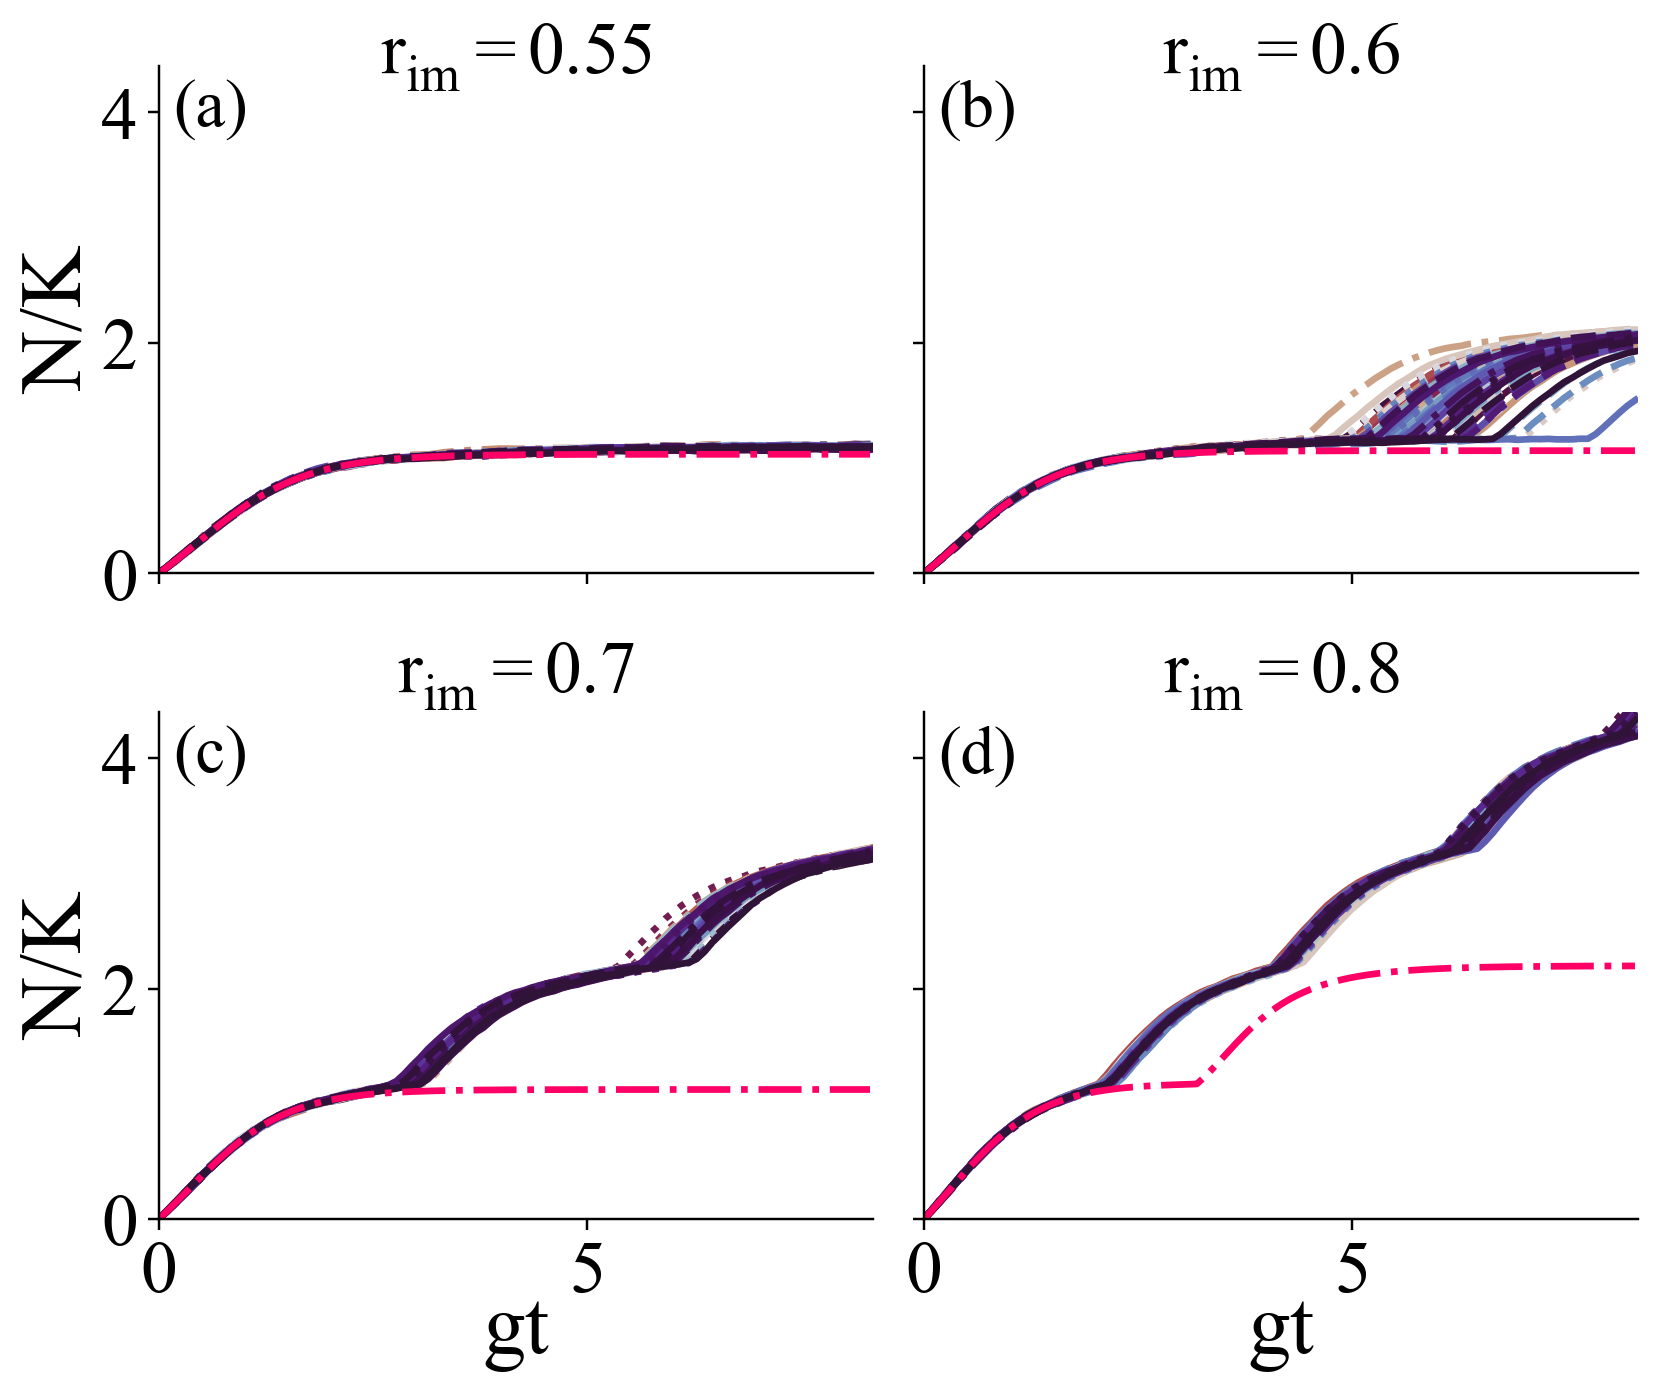

In [69]:
#here we'll plot the stochastic pops over time in a nicer looking format
#this one is for figure 4c
fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
plt.rcParams['font.sans-serif'] = "Arial"
K_val = 10000
i = 0
letters = ['a', 'b', 'c', 'd']

for ax in axs.flat:
    
            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    pop_dataset = pops4c_bigK_subset[i]
    deterministic_pops = deterministicPops_4c_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::-1])
    for p in range(nCols):

        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')
    
    
    ax.set_title("r$_{im} = $"+str(r_immig_4c_bigK_subset[i]), fontsize = 24, pad=-2)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.set_xlim(0, 8.33)
    ax.set_ylim(0, 4.4)
    ax.set_xlabel('gt', fontsize=28, labelpad=-5)
    ax.set_ylabel('N/K', fontsize=28, labelpad=0)
    
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    ax.label_outer()
    
    
    
    i = i+1

fig = plt.gcf()
#fig.suptitle("Title centered above all subplots", fontsize=24)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.xlabel("gt", fontsize=24)
# plt.ylabel("N/K", fontsize=24)


plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('paper_plots/fig4c_Immigration_stochastic.pdf', bbox_inches="tight", dpi=330)
plt.show()

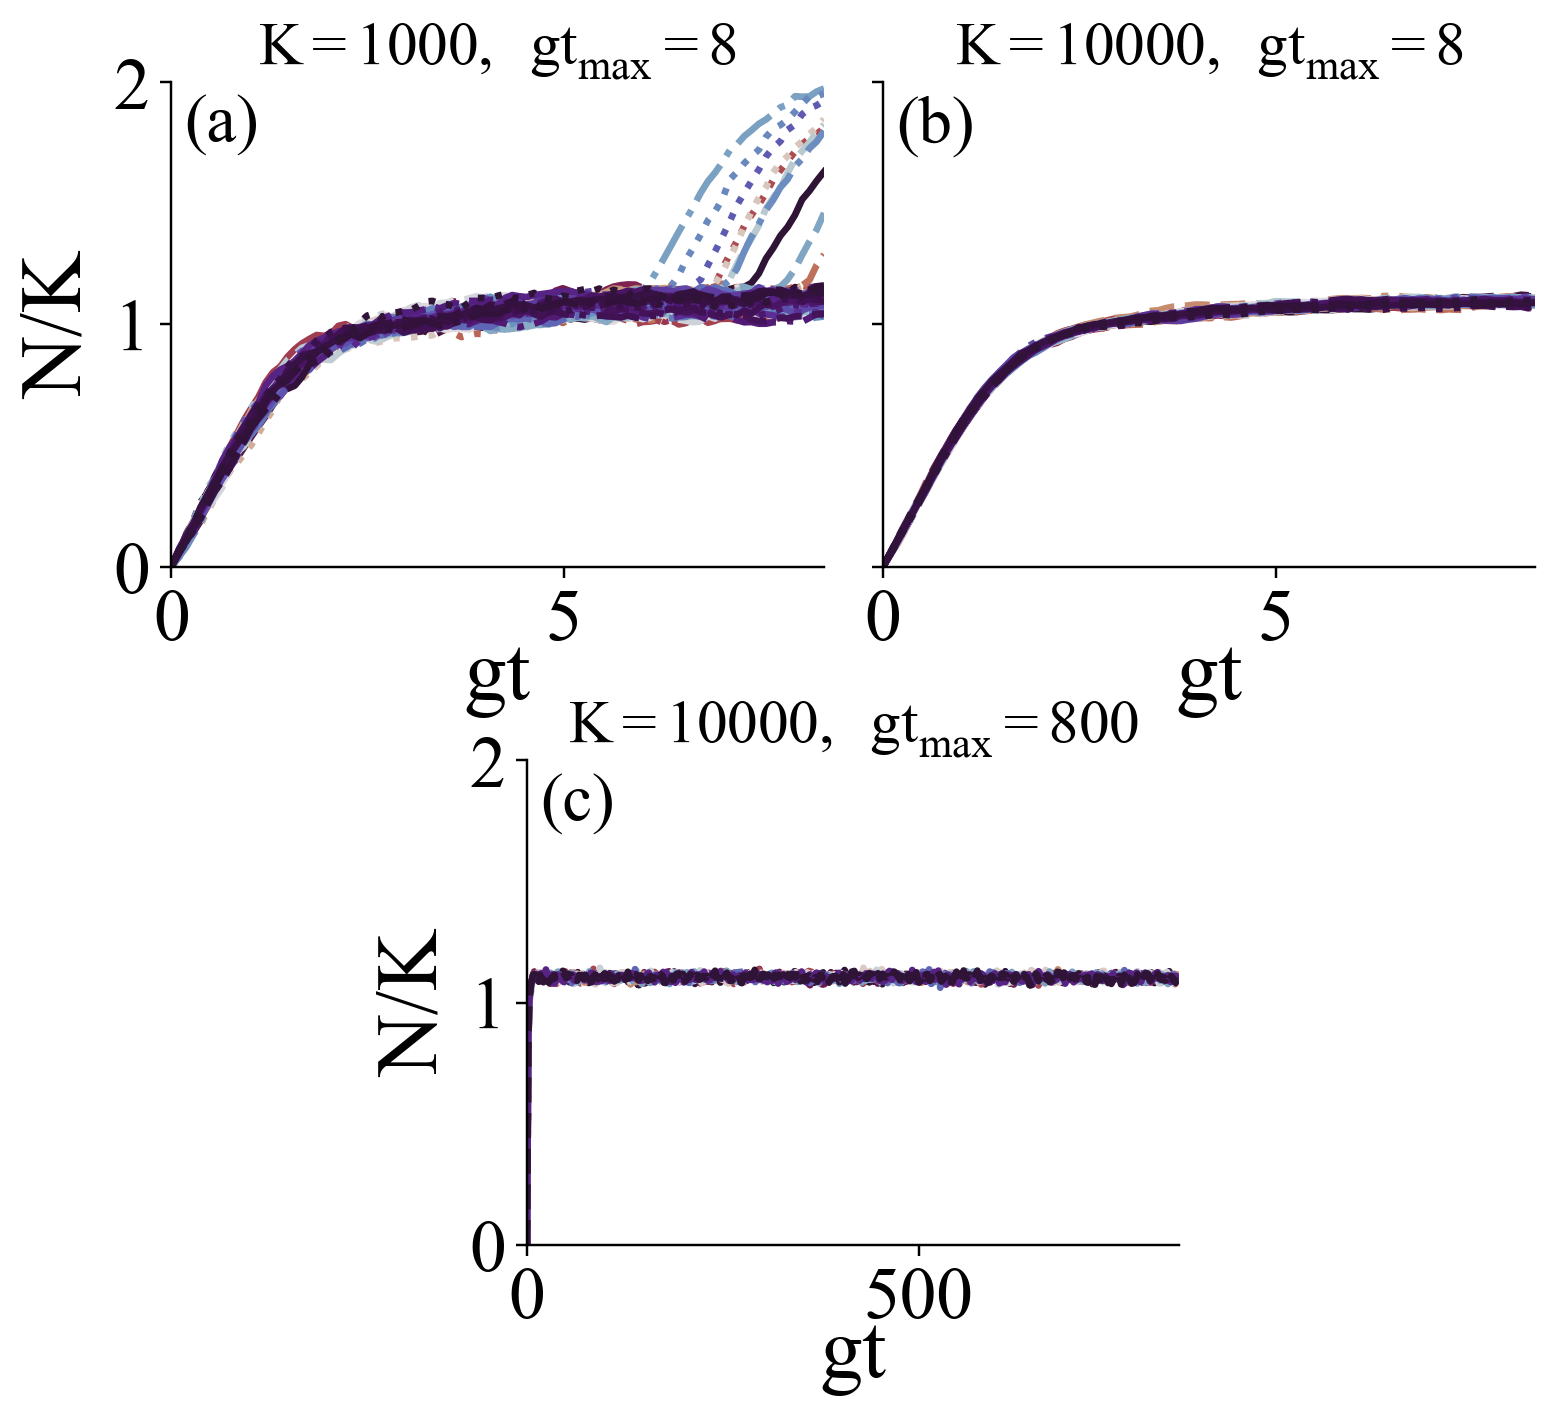

In [70]:
#now for comparison of the 4c r_immig = 0.55 plots

#plt.subplots(dpi=120, figsize=(8,6), sharey=True)
plt.figure(dpi=220, figsize=(8,7))
plt.rcParams['font.sans-serif'] = "Arial"

gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.2, hspace=0.4)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:], sharey=ax1, sharex=ax1)
ax3 = plt.subplot(gs[1, 1:3], sharey=ax1)

axes = [ax1, ax2, ax3]
letters = ['a', 'b', 'c']

for i, ax in enumerate(axes):
    if i == 0: K_val = 1000
    else: K_val = 10000
    pop_dataset = pops4c_r_imm_0_55_K_compare[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::1])
    for p in range(nCols):
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    ax.set_xlabel("$gt$", fontsize=28, labelpad=-5)
    if i != 1: ax.set_ylabel("N/K", fontsize=28)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    ax.tick_params(axis='both', which='major', labelsize=24)
    
    ax.set_ylim(0, 2)
    if i < 2: ax.set_xlim(0, 8.3)
    else: ax.set_xlim(0, 833)
    

ax1.set_title("${K} = 1000,\;\; gt_{max} = 8$", fontsize = 20)
ax2.set_title("${K} = 10000,\;\; gt_{max} = 8$", fontsize = 20)
ax3.set_title("${K} = 10000,\;\; gt_{max} = 800$", fontsize = 20)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.savefig("paper_plots/rImmg_0.55_3_comparison.pdf", bbox_inches="tight", dpi=330)
plt.show()




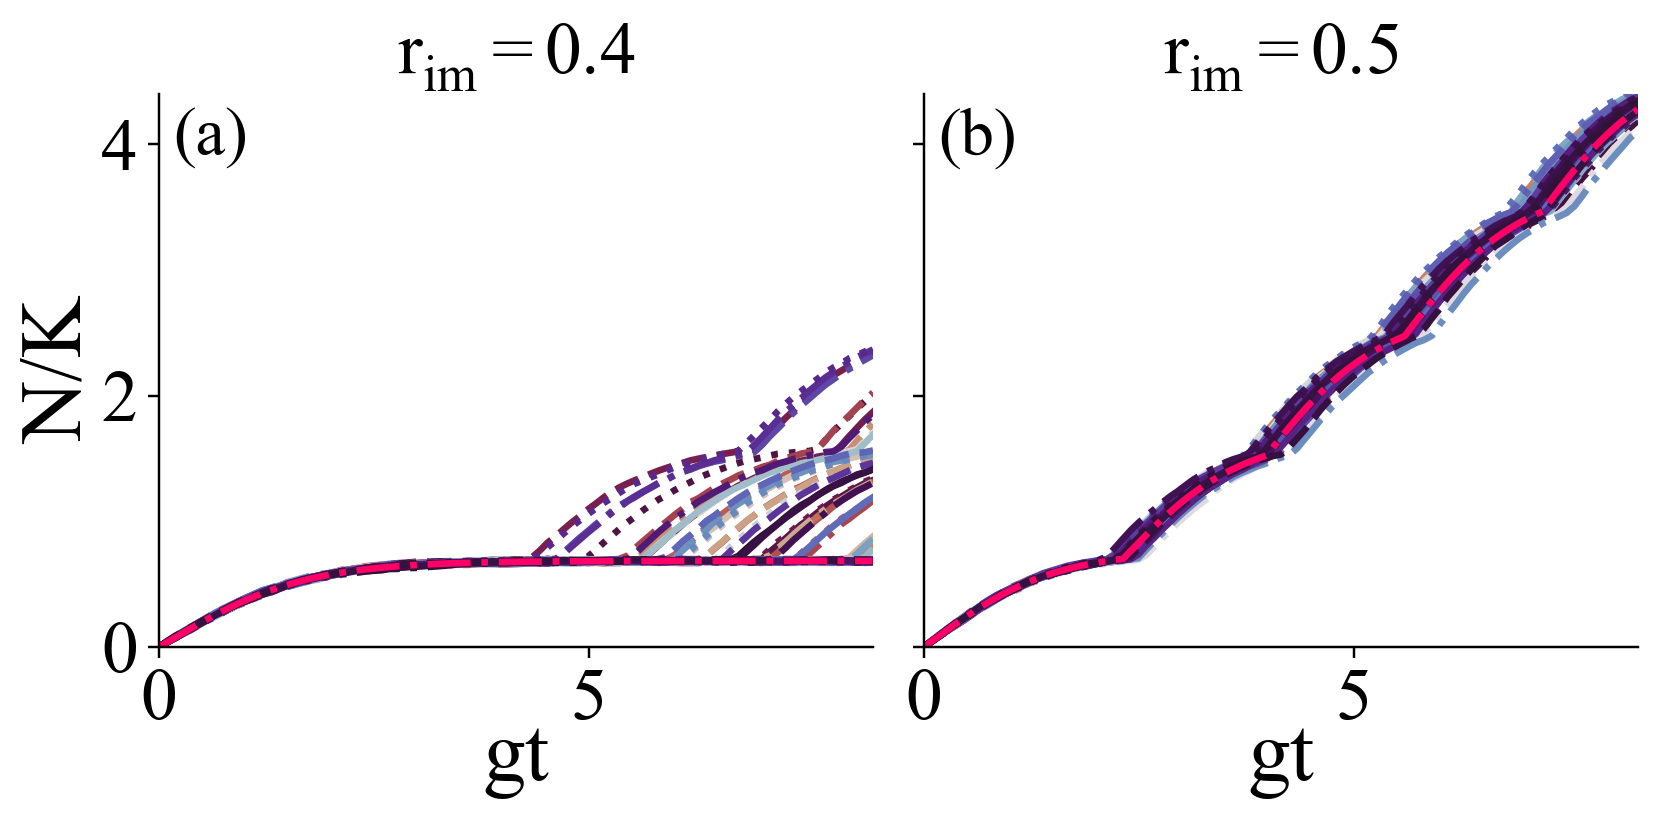

In [72]:
#now for the figure 4d plots
fig, axs = plt.subplots(1,2, figsize=(8,4.1), dpi=220, sharex=True, sharey=True)
plt.rcParams['font.sans-serif'] = "Arial"
K_val = 10000
i = 0
letters = ['a', 'b']

for ax in axs.flat:
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    pop_dataset = pops4d_bigK[i]
    deterministic_pops = deterministicPops_4d_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines)
    for p in range(nCols):

        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=2.2, color='#ff0066')

    ax.set_title("r$_{im} = $"+str(r_immig_4d[i]), fontsize = 24)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    ax.set_xlabel('gt', fontsize=28, labelpad=-5)
    ax.set_ylabel('N/K', fontsize=28, labelpad=0)
    
    ax.set_xlim(0, 8.3)
    ax.set_ylim(0, 4.4)
    
    ax.label_outer()
    
    i = i+1

fig = plt.gcf()
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.xlabel("t/g$_{\max}$", fontsize=24)
# plt.ylabel("N/K", fontsize=24)

plt.tight_layout()
plt.savefig("paper_plots/fig4d_stochastic.pdf", bbox_inches='tight', dpi=330)
plt.show()